# Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets

In [2]:
data= pd.read_csv("C:/Users/Admin/OneDrive/Desktop/work/Projects/python/vgchartz-2024.csv")

In [3]:
data.head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


# Data-cleaning

In [5]:
# Find the total null values in the dataset
data.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [6]:
# drop the null values of developer column
data.dropna(subset=['developer'], inplace=True )
# drop the null values of relase_date column
data.dropna(subset=['release_date'],inplace=True)

In [7]:
# Genre-wise mean imputation for critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales columns
data['critic_score'] = data.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data['total_sales'] = data.groupby('genre')['total_sales'].transform(lambda x: x.fillna(x.mean()))
data['na_sales'] = data.groupby('genre')['na_sales'].transform(lambda x: x.fillna(x.mean()))
data['jp_sales'] = data.groupby('genre')['jp_sales'].transform(lambda x: x.fillna(x.mean()))
data['pal_sales'] = data.groupby('genre')['pal_sales'].transform(lambda x: x.fillna(x.mean()))
data['other_sales'] = data.groupby('genre')['other_sales'].transform(lambda x: x.fillna(x.mean()))

In [8]:
# Drop rows with NaN values in 'jp_sales' column after imputation
data.dropna(subset=['jp_sales'], inplace=True)

In [9]:
# Drop columns that are not needed for analysis
data.drop(columns=['last_update'], inplace=True)

In [10]:
# Convert release_date to datetime and extract year
df = data.copy()
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df.head(3)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002


## 📈 Global Sales Forecast (Total)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
19:30:25 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1] done processing


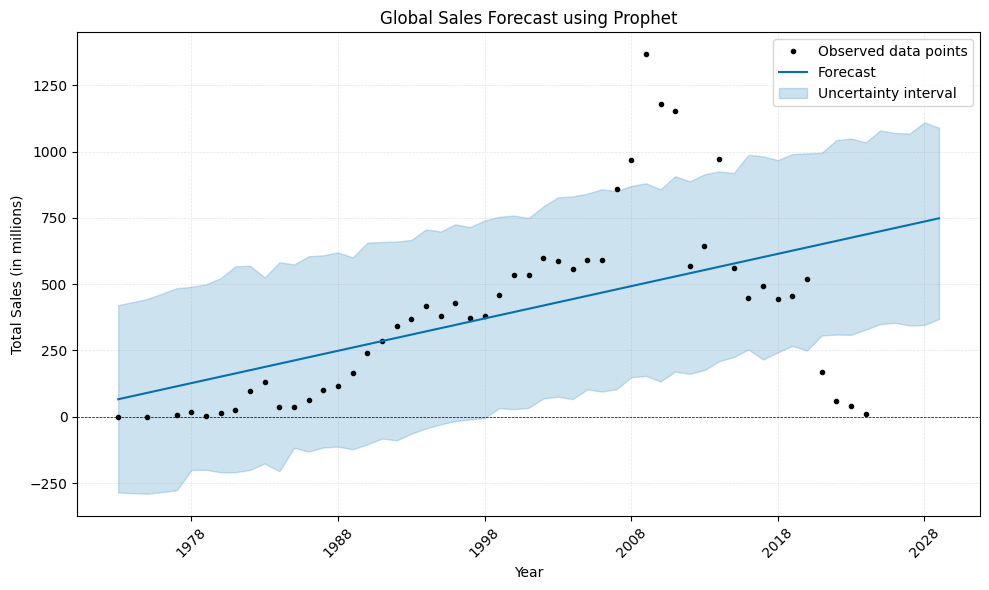

In [11]:
# Importing necessary libraries for forecasting
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for Prophet
global_sales = df.groupby('release_year')['total_sales'].sum().reset_index()
global_sales.columns = ['ds', 'y']
global_sales['ds'] = pd.to_datetime(global_sales['ds'], format='%Y')

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=False)
model.fit(global_sales)
future = model.make_future_dataframe(periods=5, freq='YE')
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title("Forecast: GLOBAL SALES", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales (in millions)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.title("Global Sales Forecast using Prophet")
plt.tight_layout()
plt.show()

# Forecast Summary: Global Video Game Sales using Prophet
1. Global sales show a consistent upward trend from the 1980s to early 2010s.
2. A noticeable dip occurs after 2017 — possibly due to missing/lower recent data.
3. The forecast for 2024–2028 predicts moderate growth in global sales.
4. Prophet's model indicates uncertainty, shown by the wide confidence interval.
* ✅Conclusion: Long-term growth is expected, but with room for market fluctuations.


## 🎮 Console-wise Forecast

19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing


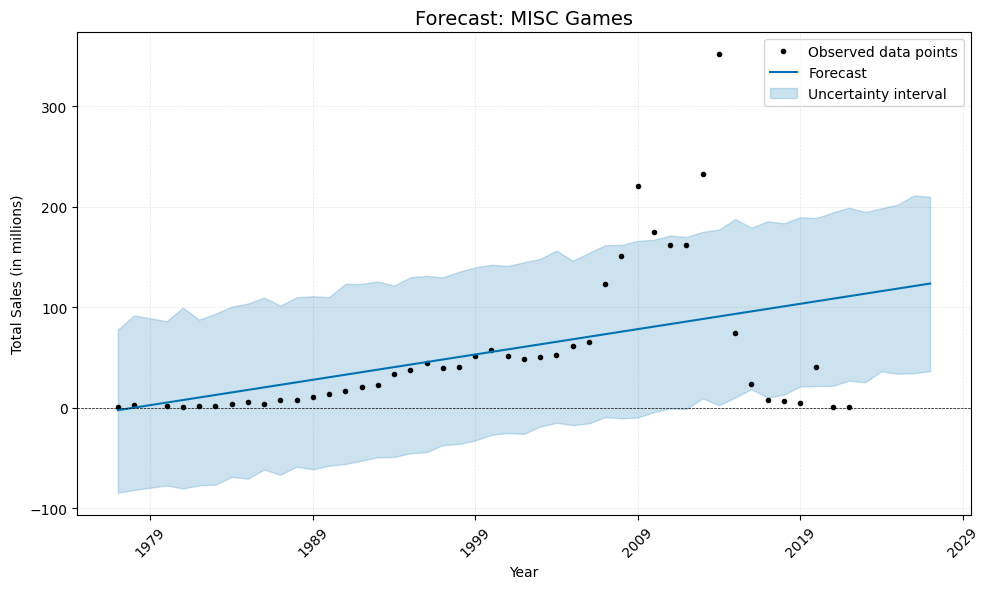

19:30:28 - cmdstanpy - INFO - Chain [1] start processing
19:30:28 - cmdstanpy - INFO - Chain [1] done processing


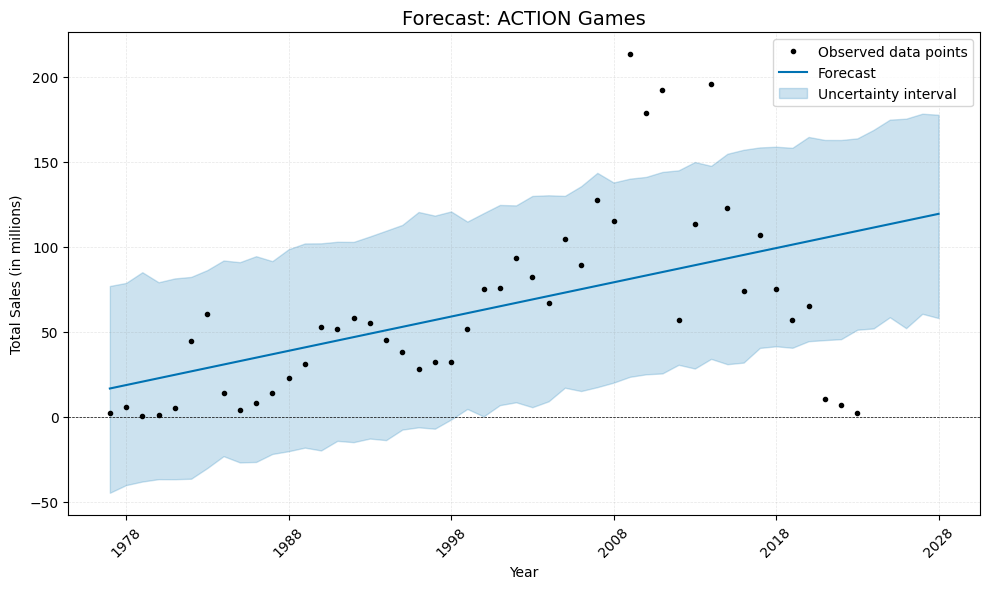

19:30:29 - cmdstanpy - INFO - Chain [1] start processing
19:30:29 - cmdstanpy - INFO - Chain [1] done processing


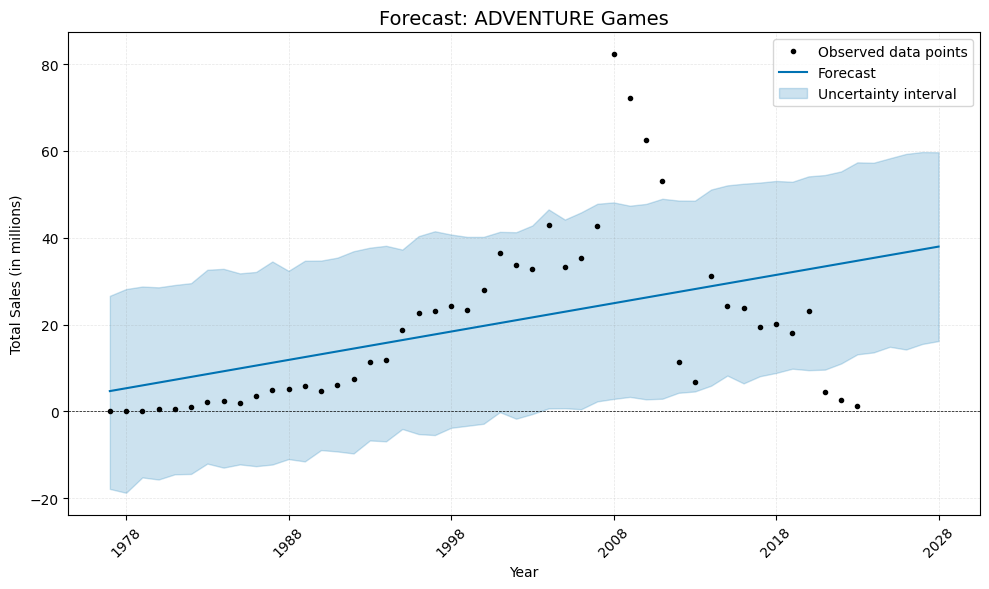

19:30:30 - cmdstanpy - INFO - Chain [1] start processing
19:30:30 - cmdstanpy - INFO - Chain [1] done processing


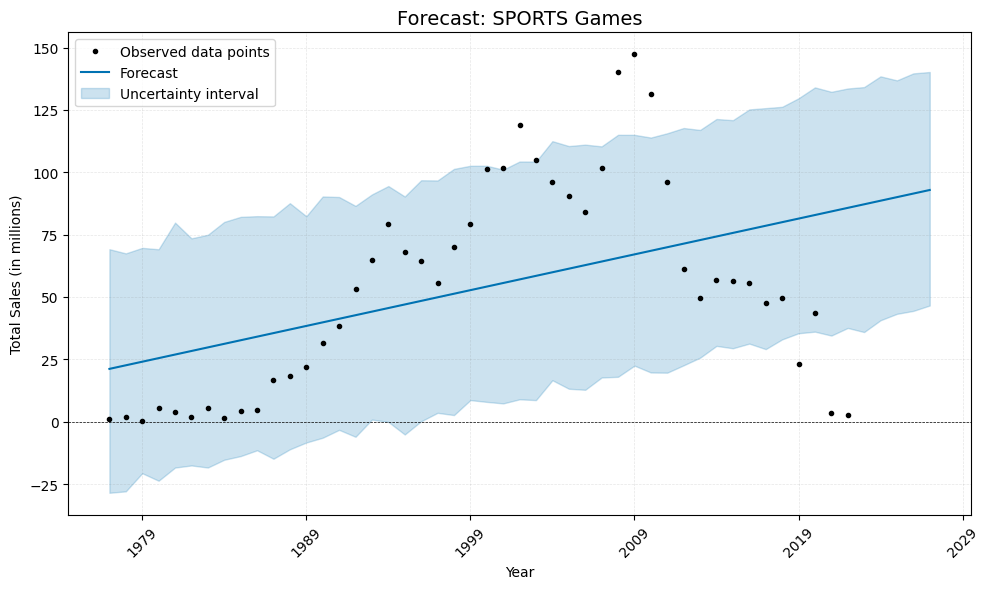

19:30:32 - cmdstanpy - INFO - Chain [1] start processing
19:30:32 - cmdstanpy - INFO - Chain [1] done processing


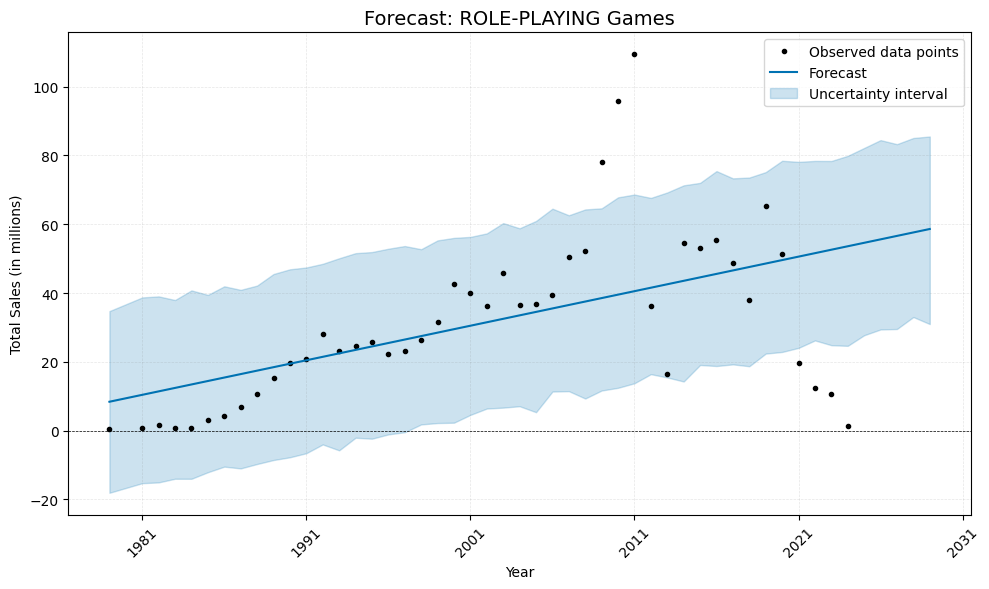

In [12]:
# Importing necessary libraries for genre-wise forecasting
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for Prophet for each genre
top_genres = df['genre'].value_counts().head(5).index.tolist()

for genre in top_genres:
    df_genre = df[df['genre'] == genre]
    sales = df_genre.groupby('release_year')['total_sales'].sum().reset_index()
    sales.columns = ['ds', 'y']
    sales['ds'] = pd.to_datetime(sales['ds'], format='%Y')

# Initialize and fit the Prophet model for each genre
    model = Prophet(yearly_seasonality=False)
    model.fit(sales)
    future = model.make_future_dataframe(periods=5, freq='YE')
    forecast = model.predict(future)

    # Use Prophet's figure and plot objects
    fig = model.plot(forecast)
    ax = fig.gca()

    # Customize the chart
    ax.set_title(f"Forecast: {genre.upper()} Games", fontsize=14)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Sales (in millions)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.legend(['Forecast', 'Actual'], loc='upper right')
    plt.legend()
    plt.tight_layout()
    plt.show()

#  Combined Forecast Summary for Top Game Genres
* The time series forecasts for the top 5 video game genres—Action, Sports, Adventure, Miscellaneous, and others—show a consistent upward trend in global sales.

* Action and Sports genres lead with strong historical performance and robust future growth.

*  Adventure and Miscellaneous genres show moderate growth, indicating a steady but niche demand.

* Forecasts include uncertainty intervals, highlighting possible fluctuations, but overall the market outlook remains positive for these genres.

. ✅ Conclusion: Investing in Action and Sports games is most promising, while Adventure and Misc categories hold steady potential with less volatility.

## 🌍 Region-wise Forecast (NA, JP, PAL, Other)

19:30:33 - cmdstanpy - INFO - Chain [1] start processing
19:30:33 - cmdstanpy - INFO - Chain [1] done processing


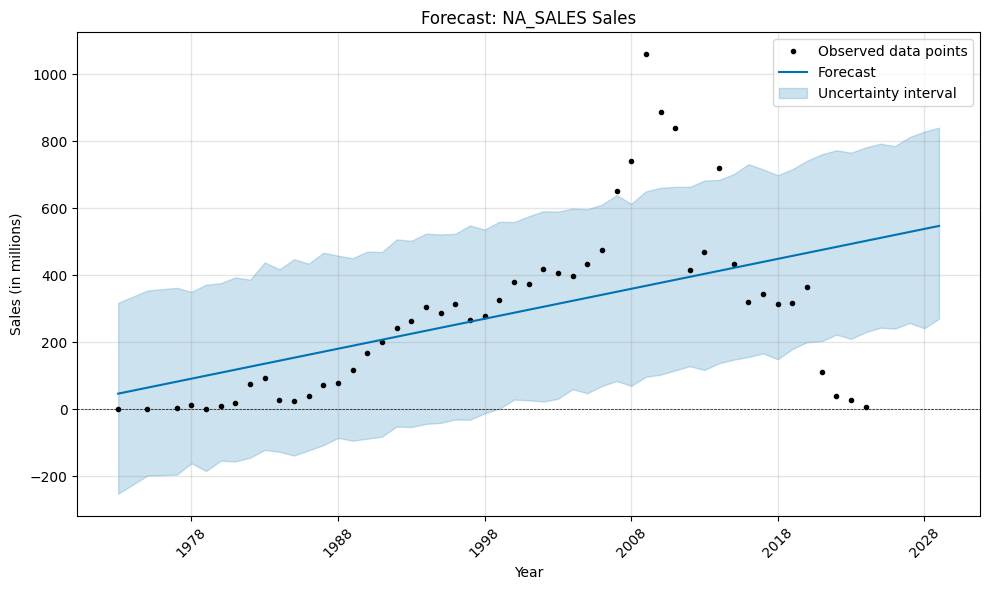

19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:34 - cmdstanpy - INFO - Chain [1] done processing


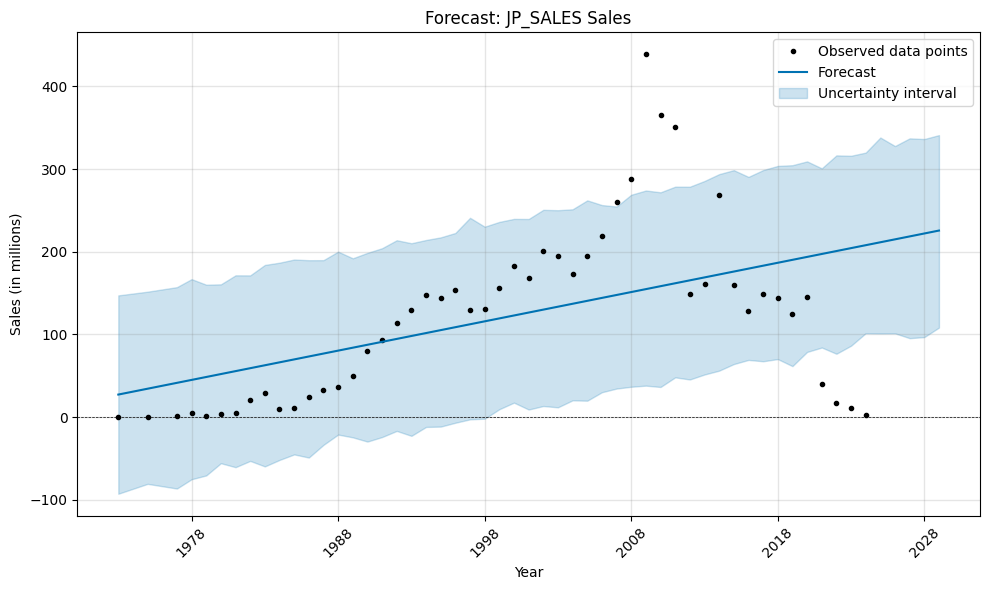

19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing


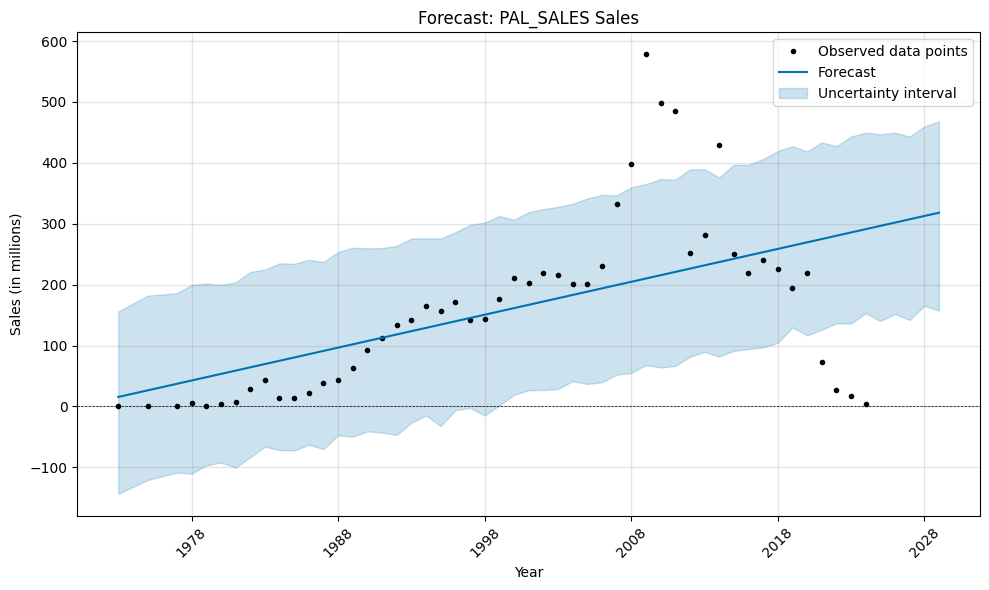

19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] done processing


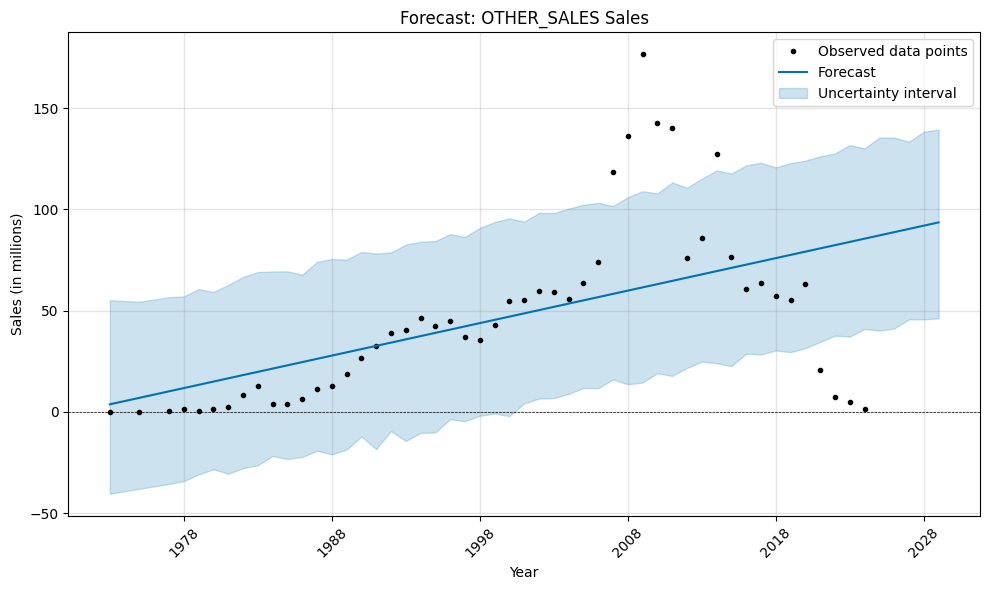

In [13]:
# Forecasting sales for different regions using Prophet
region_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']

for region in region_cols:
    region_sales = df.groupby('release_year')[region].sum().reset_index()
    region_sales.columns = ['ds', 'y']
    region_sales['ds'] = pd.to_datetime(region_sales['ds'], format='%Y')

# Initialize and fit the Prophet model for each region
    model = Prophet(yearly_seasonality=False)
    model.fit(region_sales)
    future = model.make_future_dataframe(periods=5, freq='YE')
    forecast = model.predict(future)

#  Plotting the forecast for each region
    model.plot(forecast)
    plt.title(f"Forecast: {region.upper()} Sales")
    plt.xlabel('Year')
    plt.ylabel('Sales (in millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.title(f"Forecast: {region.upper()} Sales")
    plt.show()

* Overall Sales Forecast Summary
1. NA_SALES (North America) shows high past sales but a noticeable recent decline, with future growth uncertain and wide variability in the forecast.

2. JP_SALES (Japan) also peaked in the past and is declining, with lower overall sales and a modest growth forecast.

3. PAL_SALES (Europe/Rest of World) follows a similar trend to NA, with a strong peak and recent drop, but still has moderate future growth potential.

4. OTHER_SALES (Other Regions) has lower overall sales, but shows a steady growth trend, with the forecast suggesting consistent increase ahead.

* ✅Conclusion: Investing in Action and Sports games is most promising, while Adventure and Misc categories hold steady potential with less volatility.



# Final conclusion
1. The overall industry trend is positive, with global sales expected to grow.

2. North America remains the strongest region, while other regions are emerging steadily.

3. Action and Sports genres continue to be consumer favorites.

* The uncertainty interval (blue shaded area) helps visualize potential future volatility and guides business decisions